In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Test Data/water_mass.csv')

# add 90 to the Angle from vertical column
df['theta (deg)'] = df['Angle from horizontal (deg)'] + 90

# divide x distance by 1000 to get m
df['COM (m)'] = df['x distance from COM (mm)'] / 1000

# times mass by 2
df['mass (kg)'] = df['Mass of water (kg)'] * 2

# remove Torque column
# df = df.drop(columns=['Torque', 'Mass of water (kg)', 'Angle from horizontal (deg)', 'x distance from COM (mm)' ])


df.head(20)

,Angle from horizontal (deg),Mass of water (kg),x distance from COM (mm),Torque,theta (deg),COM (m),mass (kg)
0,-40,7.18,194.71,1398.0178,50,0.19471,14.36
1,-35,11.31,195.32,2209.0692,55,0.19532,22.62
2,-30,16.14,205.77,3321.1278,60,0.20577,32.28
3,-25,15.11,236.44,3572.6084,65,0.23644,30.22
4,-20,11.95,263.42,3147.8690,70,0.26342,23.90
5,-15,9.52,279.68,2662.5536,75,0.27968,19.04
6,-10,7.54,288.80,2177.5520,80,0.28880,15.08
7,-5,5.88,291.42,1713.5496,85,0.29142,11.76
8,0,4.46,288.01,1284.5246,90,0.28801,8.92
9,5,3.21,278.87,895.1727,95,0.27887,6.42


In [11]:
# convert the first column from degrees to radians
df['theta'] = df['theta (deg)'] * np.pi/180
df.head(20)

,theta (deg),COM (m),mass (kg),theta
0,50,0.19471,14.36,0.872665
1,55,0.19532,22.62,0.959931
2,60,0.20577,32.28,1.047198
3,65,0.23644,30.22,1.134464
4,70,0.26342,23.90,1.221730
5,75,0.27968,19.04,1.308997
6,80,0.28880,15.08,1.396263
7,85,0.29142,11.76,1.483530
8,90,0.28801,8.92,1.570796
9,95,0.27887,6.42,1.658063


a = 0.7732178173079596
b = -4.808504916068159
c = 10.468692683694396
d = -9.42560937714108
e = 3.19372668997763


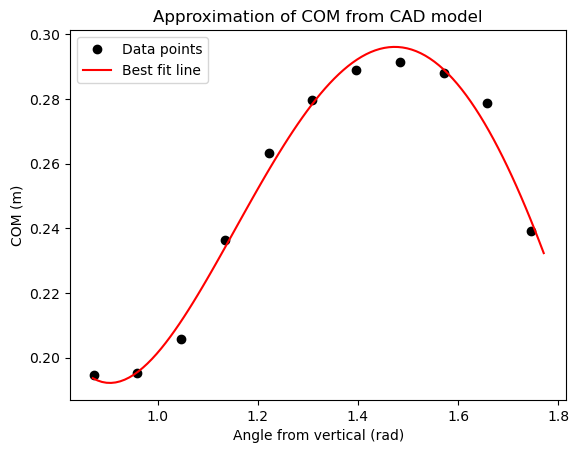

In [15]:
# plot a curved line of best fit to the COM vs theta

# find the coefficients of the best fit line
a,b, c,d,e = np.polyfit(df['theta'], df['COM (m)'], 4)

# create a list of x values
x = np.linspace(np.pi/2 - 0.7, np.pi/2 +0.2, 100)

# create a list of y values
y = a*x**4 + b*x**3 + c*x**2 + d*x + e

# plot the line
plt.plot(df['theta'], df['COM (m)'], 'o', color='black', label='Data points')
plt.plot(x, y, color='red', label='Best fit line')
plt.xlabel('Angle from vertical (rad)')
plt.ylabel('COM (m)')
plt.title('Approximation of COM from CAD model')
plt.legend()

# print the coefficients
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)
print('e =', e)






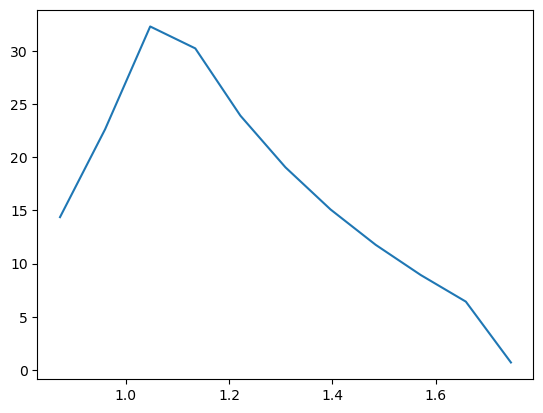

In [5]:
plt.plot(df['theta'], df['Mass of water (kg)'])

/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_31460/668815317.py:13: RuntimeWarning: divide by zero encountered in divide
  torque = 60 * vol_flow_rate / (n_blades * RPM)


Text(0.5, 1.0, 'Torque vs RPM')

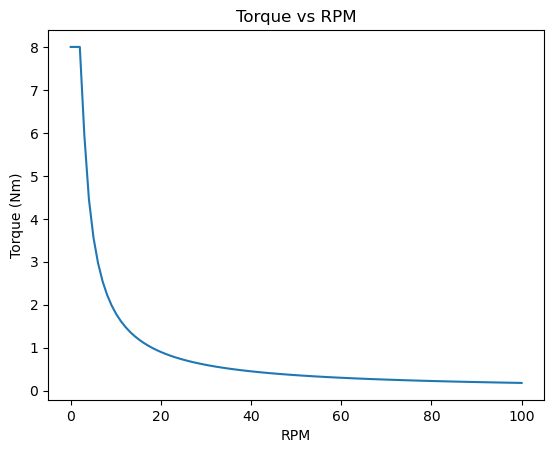

In [12]:
# modify the torque array to scale as a function of number of blades and RPM and river.vol_flow_rate
# the max torque will occur at an rpm when: bucket volume * n_blades = vol_flow_rate * 60
# volume = (RPM * 60 * vol_flow_rate) / (n_blades * max bucket)


# define constants
max_bucket = 8 # m^3
n_blades = 5
vol_flow_rate = 1.5 # m^3/s
RPM = np.linspace(0, 100, 100)

# calculate the volume of each bucket at each rpm
torque = 60 * vol_flow_rate / (n_blades * RPM)

for i in range(len(torque)):
    if torque[i] > max_bucket:
        torque[i] = max_bucket


# plot the torque vs RPM
plt.plot(RPM, torque)
plt.xlabel('RPM')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs RPM')
